In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [14]:
fraud=pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [15]:
label_encoder=preprocessing.LabelEncoder()
fraud["Undergrad"]=label_encoder.fit_transform(fraud["Undergrad"])
fraud["MaritalStatus"]=label_encoder.fit_transform(fraud["MaritalStatus"])
fraud["Urban"]=label_encoder.fit_transform(fraud["Urban"])

In [16]:
daf=pd.DataFrame(fraud.TaxableIncome)
daf.loc[fraud['TaxableIncome']<=30000,'Risky or Not']='NOT RISKY'
daf.loc[fraud['TaxableIncome']>30000,'Risky or Not']='RISKY'
z= daf
z

,TaxableIncome,Risky or Not
0,68833,RISKY
1,33700,RISKY
2,36925,RISKY
3,50190,RISKY
4,81002,RISKY
...,...,...
595,76340,RISKY
596,69967,RISKY
597,47334,RISKY
598,98592,RISKY


In [17]:
fraud.insert(6, "Risk_status",z['Risky or Not'])

In [18]:
fraud

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Risk_status
0,0,2,68833,50047,10,1,RISKY
1,1,0,33700,134075,18,1,RISKY
2,0,1,36925,160205,30,1,RISKY
3,1,2,50190,193264,15,1,RISKY
4,0,1,81002,27533,28,0,RISKY
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,RISKY
596,1,0,69967,55369,2,1,RISKY
597,0,0,47334,154058,0,1,RISKY
598,1,1,98592,180083,17,0,RISKY


In [19]:
x=fraud.iloc[:,[0,1,3,4,5]]
y=fraud['Risk_status']

In [20]:
x

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [21]:
y

0      RISKY
1      RISKY
2      RISKY
3      RISKY
4      RISKY
       ...  
595    RISKY
596    RISKY
597    RISKY
598    RISKY
599    RISKY
Name: Risk_status, Length: 600, dtype: object

In [22]:
colnames=list(fraud.columns)
colnames

['Undergrad',
 'MaritalStatus',
 'TaxableIncome',
 'CityPopulation',
 'WorkExperience',
 'Urban',
 'Risk_status']

In [23]:
x_train, x_test ,y_train, y_test =train_test_split(x,y, test_size=0.2,random_state=40)

In [24]:
model= DecisionTreeClassifier(criterion= 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

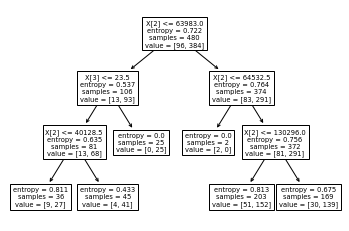

In [25]:
tree.plot_tree(model);

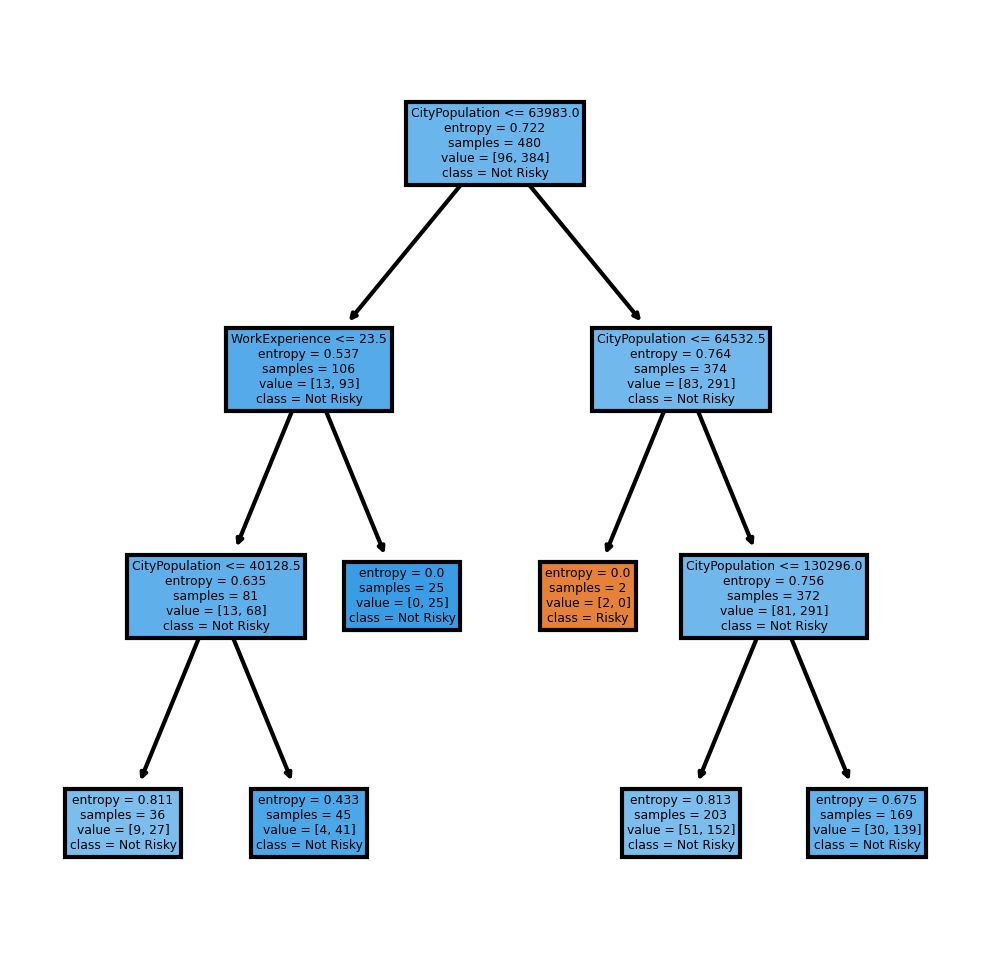

In [26]:
fn=['Undergrad','MaritalStatus','CityPopulation','WorkExperience','Urban']
cn=['Risky','Not Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 